In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
v01 = pd.read_csv("data/v0.1.csv")
new = pd.read_csv("data/after_spectra.csv")
v01_high = pd.read_csv("data/v0.1_high.csv")
new_high = pd.read_csv("data/after_spectra_high.csv")

threshold = v01.iloc[:,0] #The thresholds are aligned for both sets
thresh_hi = v01_high.iloc[:,0]
#Now get rates
rate_1 = v01.iloc[:,1]
rate_n = new.iloc[:,1]
rate_1h = v01_high.iloc[:,1]
rate_nh = new_high.iloc[:,1]

#Remove variables that won't be used again.
del v01,new

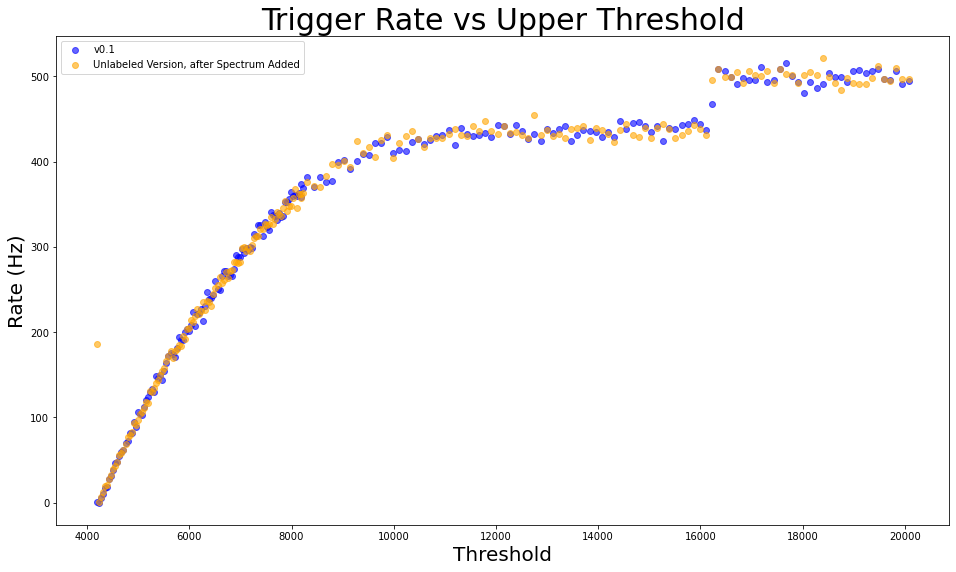

In [3]:
plt.figure(figsize=(16,9))

plt.scatter(threshold,rate_1,label="v0.1",alpha=0.6,color='blue')
plt.scatter(threshold,rate_n,label="Unlabeled Version, after Spectrum Added",alpha=0.6,color='orange')
plt.scatter(thresh_hi,rate_1h,alpha=0.6,color='blue')
plt.scatter(thresh_hi,rate_nh,alpha=0.6,color='orange')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate vs Upper Threshold",size=30)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

plt.legend()
plt.show()

In [4]:
import lmfit as lf

def f(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

l_mod = lf.Model(f)
params = l_mod.make_params(a=0,b=0,c=1,d=400)
l_fit = l_mod.fit(rate_nh[thresh_hi<16000],params,x=thresh_hi[thresh_hi<16000])
l_dict = l_fit.best_values
def fitted(x):
    return l_dict['a']*x**3 + l_dict['b']*x**2 + l_dict['c']*x + l_dict['d']
l_fit

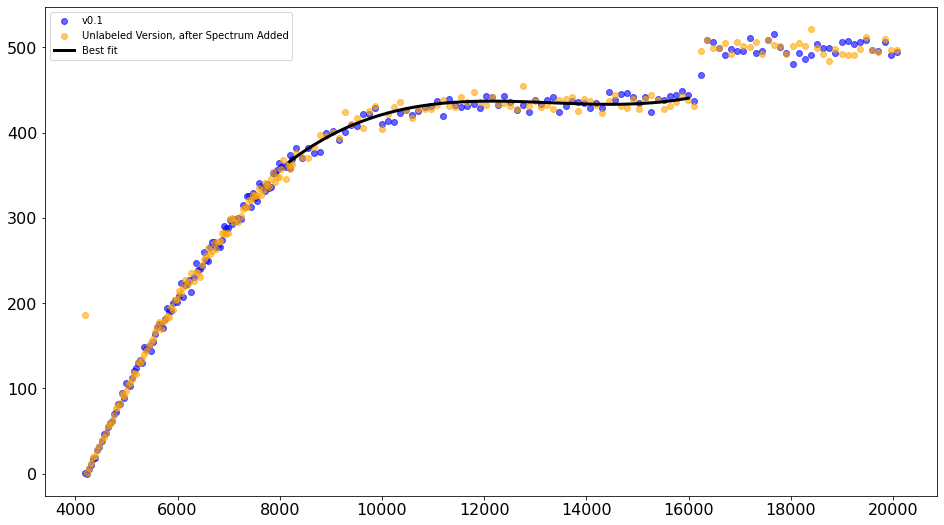

6.951237074086293


In [5]:
plt.figure(figsize=(16,9))

plt.scatter(threshold,rate_1,label="v0.1",alpha=0.6,color='blue')
plt.scatter(threshold,rate_n,label="Unlabeled Version, after Spectrum Added",alpha=0.6,color='orange')
plt.scatter(thresh_hi,rate_1h,alpha=0.6,color='blue')
plt.scatter(thresh_hi,rate_nh,alpha=0.6,color='orange')

plt.plot(thresh_hi[thresh_hi<16000],fitted(thresh_hi[thresh_hi<16000]),label='Best fit',color='black',linewidth=3)

plt.legend()
plt.show()

print(fitted(15760)-fitted(10760))

In [6]:
l_mod = lf.Model(f)
params = l_mod.make_params(a=0,b=0,c=1,d=400)
l_fit = l_mod.fit(rate_1h[thresh_hi<16000],params,x=thresh_hi[thresh_hi<16000])
l_dict = l_fit.best_values

def fitted(x):
    return l_dict['a']*x**3 + l_dict['b']*x**2 + l_dict['c']*x + l_dict['d']
l_fit

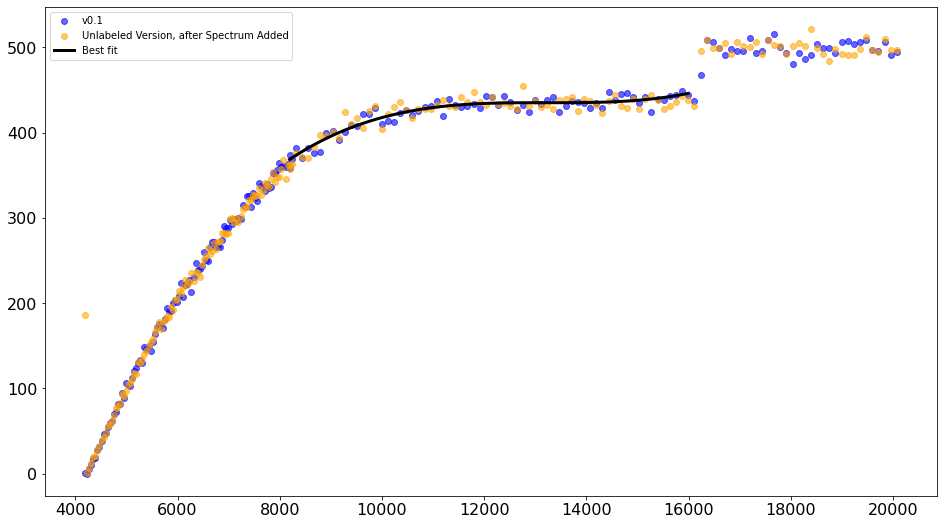

16.078776027347658


In [7]:
plt.figure(figsize=(16,9))

plt.scatter(threshold,rate_1,label="v0.1",alpha=0.6,color='blue')
plt.scatter(threshold,rate_n,label="Unlabeled Version, after Spectrum Added",alpha=0.6,color='orange')
plt.scatter(thresh_hi,rate_1h,alpha=0.6,color='blue')
plt.scatter(thresh_hi,rate_nh,alpha=0.6,color='orange')

plt.plot(thresh_hi[thresh_hi<16000],fitted(thresh_hi[thresh_hi<16000]),label='Best fit',color='black',linewidth=3)

plt.legend()
plt.show()

print(fitted(15760)-fitted(10760))